In [1]:
using Random, LinearAlgebra, Polynomials, StatsPlots

In [2]:
function canon(A, x)
    """
    Evalua un polinomio en forma canonica
    A: terminos
    x: punto a evaluar
    """
    return sum([Float64(a)*(Float64(x)^(c-1)) for (c, a) in enumerate(A)])
end

function prdct(B, x)
    """
    Evalua un polinomio en forma de producto
    B: terminos
    x: punto a evaluar
    """
    B2 = copy(B)
    sign = splice!(B2,1)
    return sign * prod([Float64(x+b) for b in B2])
end

function genPoly(N, d=10)
    """
    Genera los datos a usar para los coeficientes y raices, devuelve ambos
    N: rango de valores a usar, de -N/2 a N/2 de un grado d
    """
    N = 100
    B = [rand(1:N) - N/2 for _ in 1:d]
    A = coeffs(poly(-B))
    pushfirst!(B, 1)
    return A, B
end

function evalPoly(A, B, iter=100)
    """
    Funcion que evaluar si dos polinomios son equivalentes
    A: coeficientes de forma canonica
    B: constantes de forma producto
    iter: numero de iteraciones a probar
    """
    deg = length(A) - 1
    N = 100 * deg
    for _ in 1:iter
        x = rand(1:N)
        c = canon(A, x)
        p = prdct(B, x)
        if c ≉ p
            #println(x)
            return false
        end
    end
    return true
end

evalPoly (generic function with 2 methods)

In [7]:
N = 100
D = [5, 10, 15, 20, 30]

T = Array{Float64}(undef, N, 5)

j = 1

time_ns()

for d in D
    for i in 1:N
        t = time_ns()
        A, B = genPoly(10, d)
        evalPoly(A, B, 100)
        T[i, j] = (time_ns() - t) * 1.0e-12
    end
    j+=1
end

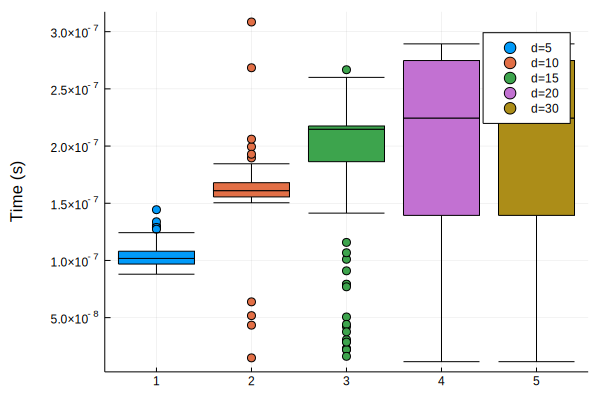

In [8]:
gr()
boxplot(T[:, 1], label="d=5", ylabel="Time (s)")
boxplot!(T[:, 2], label="d=10")
boxplot!(T[:, 3], label="d=15")
boxplot!(T[:, 4], label="d=20")
boxplot!(T[:, 4], label="d=30")